# Imports/utility functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import gc, os, cna, warnings
import scanpy as sc
import tpae.data.samples as tds
import tpae.data.patchcollection as tdp
import tpae.vis as tv
from PIL import Image
fs_axislabel = 10
fs_figsubpanel = 14
fs_legend = 8

# Prepare

## read data

In [2]:
d = cna.read('_results/default-vae.h5ad'); d.sampleid = 'sid'
d_tnf = cna.read('_results/default-vae-tnf.h5ad'); d_tnf.sampleid = 'sid'

In [3]:
patchsize = 40; patchstride = 10

# read in samples
def fname_parser(fname):
    fname = fname.split('/')[-1].split('.nc')[0]
    return {
        'donor': fname.split('_')[0].replace('Repeat',''),
        'sid': fname
    }
repname = 'pca_k=10_harmony'
samples = tds.read_samples(f'../../UC/UC-data/10u/{repname}/*.nc', fname_parser)

P = tdp.PatchCollection(
    tds.choose_patches(samples, patchsize, patchstride, max_frac_empty=0.8),
                        samples, standardize=True)
sid_nums = {sid:sid_num for sid, sid_num in P.meta[['sid','sid_num']].drop_duplicates().values}

# choose which patches to do case/ctrl analysis on
Pdense = tdp.PatchCollection(
    tds.choose_patches(samples, patchsize, patchstride, max_frac_empty=0.5),
                        samples, sid_nums=sid_nums, standardize=True)

100%|███████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 15.19it/s]


in pytorch mode
means: [ 0.10416964  0.03281972 -0.01538879 -0.05838267 -0.05421888  0.00433696
  0.00879596 -0.09059326  0.01674822  0.04969913]
stds: [2.776051   1.6159282  1.5300021  0.9852963  0.7062614  0.6945496
 0.8567582  0.7091614  0.85082525 0.701276  ]
data augmentation is off


100%|███████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 19.40it/s]


in pytorch mode
means: [ 0.08236381  0.01278755 -0.03404665 -0.06954374 -0.0628806  -0.00149563
  0.01076757 -0.1060385   0.00874149  0.04395052]
stds: [2.9122937  1.7142411  1.6145836  1.041371   0.75078416 0.7382961
 0.90168667 0.7512863  0.8895767  0.741445  ]
data augmentation is off


## colormaps

100%|███████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 15.83it/s]


in pytorch mode
means: [ 0.01689853  0.00150782  0.00527179  0.00535973  0.00563713  0.00035674
 -0.00802902  0.00432041  0.00094687 -0.00433476  0.01284719  0.0094585
 -0.00270638  0.00814351 -0.00313801 -0.01112057  0.00383317 -0.00495429
 -0.00788541 -0.01023488  0.0047913  -0.00592913 -0.01485476  0.0021058
 -0.0021217  -0.00110764  0.00334466 -0.0105605  -0.01013463 -0.00696436
 -0.00997066 -0.00920861 -0.00575585  0.00359679 -0.00499026 -0.00193194
  0.01539656  0.00873199  0.02084314  0.00248972 -0.00681108  0.00046599
  0.00293328 -0.00612518  0.00206253  0.00428439 -0.00389833  0.00340066
  0.01087213 -0.0030932  -0.00417711  0.00387422]
stds: [0.849944   0.84937745 0.85712755 0.8566543  0.8526964  0.8390585
 0.86141056 0.85911983 0.8542565  0.853708   0.8462152  0.8628421
 0.8473151  0.85489416 0.84853673 0.8608731  0.86241966 0.8464682
 0.85243446 0.84907144 0.86119395 0.8514528  0.84576476 0.85914344
 0.83567166 0.8553636  0.8497639  0.8544589  0.8480818  0.8570246
 0.83197

100%|███████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 18.28it/s]


in pytorch mode
means: [ 0.03449724  0.01003667  0.01028513  0.01651513  0.01062219  0.00421297
 -0.01106942  0.01176674  0.00527334  0.00281005  0.0175637   0.02482183
  0.00535974  0.02847244 -0.00391645 -0.03115806  0.01700768 -0.00614039
 -0.01147956 -0.00732673  0.00456196 -0.00182694 -0.02725989  0.00425427
  0.00424051  0.00520934  0.01100224 -0.00748306 -0.00759928 -0.01673275
 -0.00456985 -0.00128188  0.00149618  0.01622898 -0.00015934 -0.00541593
  0.0364792   0.0305916   0.03350923  0.01022761 -0.00281865 -0.00035295
  0.01265995 -0.01765007 -0.00101518  0.01630197 -0.00075595  0.00843501
  0.01763399  0.00134727 -0.00521357  0.01957302]
stds: [0.8806789  0.89587    0.9123064  0.8991924  0.9009209  0.89180565
 0.911095   0.9109246  0.8977162  0.9032414  0.8893215  0.9166873
 0.8890138  0.90067846 0.88633645 0.8971018  0.90851766 0.88479066
 0.8973727  0.8885653  0.91489947 0.8980492  0.88519365 0.90510684
 0.8693539  0.89828724 0.8911389  0.89878726 0.8878093  0.9028704
 0.8

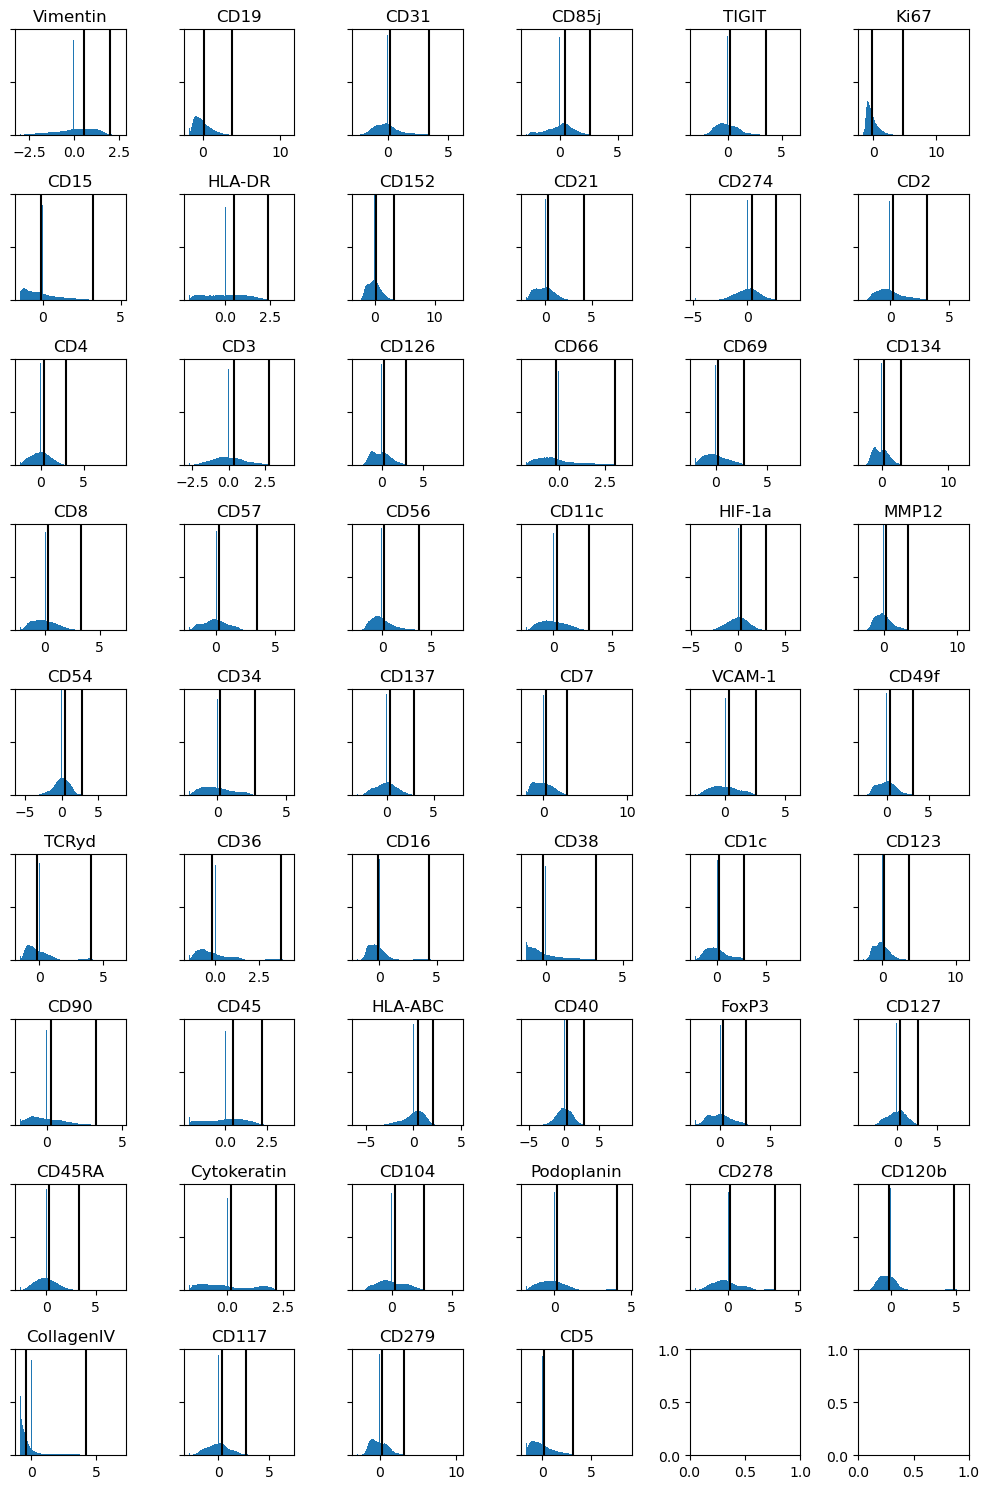

In [4]:
# read in samples
def fname_parser(fname):
    fname = fname.split('/')[-1].split('.nc')[0]
    return {
        'donor': fname.split('_')[0].replace('Repeat',''),
        'sid': fname
    }
samples_m = tds.read_samples(f'../../UC/UC-data/10u/normalized/*.nc', fname_parser)
patchsize = 40; patchstride = 10
M = tdp.PatchCollection(
    tds.choose_patches(samples_m, patchsize, patchstride, max_frac_empty=0.8),
                        samples_m, standardize=True)
Mdense = tdp.PatchCollection(
    tds.choose_patches(samples_m, patchsize, patchstride, max_frac_empty=0.5),
                        samples_m, standardize=True)
markers = list(list(samples_m.values())[0].marker.values)
gc.collect()

# make histogram of all markers
from scipy import stats
def make_hists(pixels, threshs=[60,99]):
    fig, axs = plt.subplots(9,6,figsize=(10,15))
    percentiles = {}
    for i, ax in zip(range(len(markers)), axs.flatten()):
        nums = pixels[:,:,:,i].flatten()
        [a, b] = np.percentile(nums[(nums-stats.mode(nums)[0])**2 > 0.01], threshs)
        percentiles[markers[i]] = [a,b]
        ax.hist(nums, bins=100)
        ax.set_title(markers[i]); ax.set_yticklabels([]); ax.set_ylim(0,200000)
        ax.axvline(a, color='k'); ax.axvline(b, color='k')
    plt.tight_layout(); plt.show()
    return percentiles

# use histograms of each marker to define scaling functions used to determine color intensities
M.numpy_mode()
Mdense.numpy_mode()
raw_percentiles = make_hists(M[::50][0])
raw_scalers = {
    m : tv.scaler(raw_percentiles[m][0],raw_percentiles[m][1])
    for m in markers}

In [145]:
#define colormaps
tbf_cmap = [
    [markers.index(m), c, raw_scalers[m]]
    for m, c in zip(['CD3', 'CD19', 'CD15'],
                    np.array([[0,1,0],[1,0,0],[0,0,1]]) * \
                    np.array([[1],[1],[1]]))]

In [86]:
#define patch-wide marker avgs and covs
Mdense.numpy_mode()
Mdense_avg = Mdense[:][0].mean(axis=(1,2))
Mdense_std = Mdense[:][0].std(axis=(1,2))
Mdense_unrolled = ((Mdense[:][0] - Mdense_avg[:,None,None,:])/Mdense_std[:,None,None,:]).reshape((-1,40*40,len(markers)))
ind = np.triu_indices(52)
Mdense_cov_square = np.array([(X.T.dot(X) / len(X)) for X in Mdense_unrolled])
Mdense_cov = np.array([cov[ind] for cov in Mdense_cov_square])
Mdense_cov = pd.DataFrame(data=Mdense_cov,
                          columns=[f'{markers[a]},{markers[b]}' for a, b in zip(*ind)],
                          index=d.obs.index)
Mdense_avg = pd.DataFrame(data=Mdense_avg,
                          columns=markers,
                          index=d.obs.index)

data augmentation is off
in numpy mode


# Figure

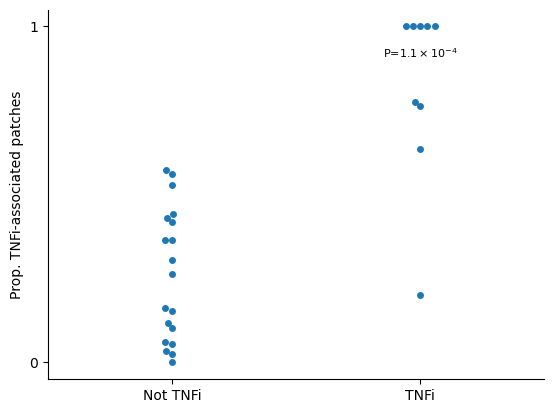

In [613]:
def umap(ax):
    sc.pl.umap(d, ax=ax, show=False, s=2)
    sc.pl.umap(d[d.obs.ncorr_thresh != 0], color='ncorr_thresh', cmap='seismic', vmin=-1, vmax=1, s=7, ax=ax, show=False,
               colorbar_loc=None, frameon=False, title='')

    p = 0.0006499935000649994
    formatted = f"${p:.1e}"
    formatted_latex = formatted.replace('-0', '-').replace("e", r" \times 10^{").replace("+", "").replace("-", r"-") + "}$"
    ax.text(2.8, -1, f'P={formatted_latex}', ha='left', va='bottom', fontsize=fs_legend, fontweight='medium')

def markerplot(ax, nmarkers):
    pos = d.obs.ncorr_thresh > 0
    neg = d.obs.ncorr_thresh <= 0
    tv.diff_markers(pd.DataFrame(Mdense_avg, index=d.obs.index, columns=markers),
                    d.obs[pos].index, d.obs[neg].index, markers,
                    labels=['UC-associated','Control-associated'], nmarkers=nmarkers, ascending=False, ax=ax, show=False,
                    split=True, inner='quart', density_norm='count',
                    palette={'UC-associated': "red", 'Control-associated': "blue"})
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, title=None)
    ax.set_ylabel('Avg. normalized intensity')
    ax.set_yticks([-2, 0, 2])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_xlabel('')
    ax.spines[['right','top']].set_visible(False)

from io import BytesIO
from PIL import Image
def clust_examples(ax, mask, cmap, label, nx=3, ny=3, scalebar=True, seed=0):
    np.random.seed(seed)
    idx = np.random.choice(np.where(mask)[0], size=nx*ny, replace=False)
    fig = tv.plot_patches_overlaychannels_linsum(
                Mdense[idx][0],
                d.X[idx],
                cmap,
                nx=nx, ny=ny,
                show=False
            )
    fig.patch.set_facecolor('black')
    buff = BytesIO()
    fig.savefig(buff, format="png", bbox_inches="tight", dpi=800)
    plt.close(fig)
    buff.seek(0)
    ax.imshow(Image.open(buff))
    text = ax.text(100, 100, label, fontsize=fs_axislabel, color='black', ha='left', va='top')
    text.set_path_effects([withStroke(linewidth=3, foreground='white')])

    if scalebar:
        xmin, xmax = ax.get_xlim()
        ymax, ymin = ax.get_ylim()
        width = (xmax - xmin)/(1.2*nx + 0.2)
        pad = 0.15*width
        ax.plot([xmax-width/4-pad, xmax-pad], [ymax-1.2*pad, ymax-1.2*pad], color='white', linewidth=3)
    ax.axis('off')

def markerplot_tnf(ax, nmarkers):
    pos = d_tnf.obs.ncorr_thresh > 0
    neg = d_tnf.obs.ncorr_thresh < 0
    tv.diff_markers(Mdense_avg,
                    d_tnf.obs[neg].index, d_tnf.obs[pos].index, Mdense_avg.columns,
                    labels=['Non-TNFi-associated', 'TNFi-associated'], nmarkers=nmarkers, ascending=False, bothends=True, ax=ax, show=False,
                    split=True, inner='quart', density_norm='count',
                    palette={'TNFi-associated': "orange", 'Non-TNFi-associated': "green"})
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.axvline(x=3.5, ls='--', color='gray')
    ax.legend(handles, labels, title=None)
    ax.set_ylabel('Avg. normalized intensity', fontsize=fs_axislabel)
    # ax.set_xlabel('Marker', fontsize=fs_axislabel) 
    ax.set_xlabel('')
    ax.set_yticks([-2, 0, 2])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.spines[['right','top']].set_visible(False)

from matplotlib.patheffects import withStroke
from matplotlib.colors import LinearSegmentedColormap
go_cmap = LinearSegmentedColormap.from_list("green_orange_divergent", ["green", "white", "orange"])
def umap_tnf(ax):
    sc.pl.umap(d_tnf, ax=ax, show=False, s=5)
    sc.pl.umap(d_tnf[d_tnf.obs.ncorr_thresh != 0], color='ncorr_thresh', cmap=go_cmap, vmin=-0.4, vmax=0.4, s=15, ax=ax, show=False,
               colorbar_loc=None, frameon=False, title='')

    p = 0.0013799862001379986
    formatted = f"${p:.1e}"
    formatted_latex = formatted.replace('-0', '-').replace("e", r" \times 10^{").replace("+", "").replace("-", r"-") + "}$"
    ax.text(13, -9, f'P={formatted_latex}', ha='left', va='bottom', fontsize=fs_legend, fontweight='medium')

    # fontprops = {'fontsize':fs_axislabel, 'fontweight':'medium', 'color':'black', 'ha':'center', 'va':'center'}
    # for label, cond in [('TNFi', d_tnf.obs.ncorr_thresh > 0), ('no TNFi', d_tnf.obs.ncorr_thresh < 0)]:
    #     text = ax.text(*np.median(d_tnf.obsm['X_umap'][cond], axis=0), label, **fontprops)
    #     text.set_path_effects([withStroke(linewidth=3, foreground='white')])

from io import BytesIO
from PIL import Image
def spatialplot(ax, samples, sids, marker, highlight, ncols=5, vmin=-2, vmax=2):
    nrows = int(np.ceil(len(sids)/ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
    for ax_, sid in zip(axs.flatten(), sids):
        i = np.where(samples[sid].marker == marker)[0][0]
        toplot = samples[sid].sel(marker=marker).data.copy()
        # toplot[toplot == 0] = vmin
        ax_.imshow(toplot, cmap='PuBu', vmin=vmin, vmax=vmax)
        white = np.ones((*toplot.shape, 4))
        white[toplot != 0] = 0
        ax_.imshow(white)

        mypatches = d.obs[d.obs.sid == sid]
        myhighlight = highlight[mypatches.index]
        mask = tds.union_patches_in_sample(mypatches[myhighlight != 0], samples_m[sid])
        boundary = tds.get_boundary(mask.data, [1,0,0,1], thickness=5)
        ax_.imshow(boundary)
        ax_.set_title('Control' if 'HC' in sid else 'UC', fontsize=6)
        ax_.axis('off')
    # fig.patch.set_facecolor('black')
    buff = BytesIO()
    fig.savefig(buff, format="png", bbox_inches="tight", dpi=800)
    plt.close(fig)
    buff.seek(0)
    ax.imshow(Image.open(buff))
    ax.axis('off')

import seaborn as sns
from scipy.stats import mannwhitneyu
def cnascore(ax):
    ct_ = d_tnf.samplem[['tnf_npatches','tnf_npos','tnf_nneg']].fillna(0).copy()
    ct_ = ct_[ct_.tnf_npos + ct_.tnf_nneg >= 10]
    ct_ = ct_.div(ct_.tnf_npatches, axis=0)
    ct_['TNFand'] = (d_tnf.samplem.TNFprior == 'y') & (d_tnf.samplem.TNFprior == 'y')
    ct_['pos_neg_ratio'] = ct_.tnf_npos / (ct_.tnf_npos + ct_.tnf_nneg)
    
    pheno = 'TNFand'
    pred = 'pos_neg_ratio'
    a = ct_[ct_[pheno]][pred]
    b = ct_[~ct_[pheno]][pred]
    p = mannwhitneyu(a, b, alternative='greater').pvalue
    formatted = f"${p:.1e}"
    formatted_latex = formatted.replace('-0', '-').replace("e", r" \times 10^{").replace("+", "").replace("-", r"-") + "}$"
    
    df = pd.DataFrame({'TNFi Status': ['Not TNFi'] * len(b) + ['TNFi'] * len(a), 'Prop. associated patches in TNFi group': b.tolist() + a.tolist()})
    sns.swarmplot(ax=ax, data=df, x='TNFi Status', y='Prop. associated patches in TNFi group')
    ax.set_ylabel('Prop. TNFi-associated patches', fontsize=fs_axislabel)
    ax.set_xlabel('', fontsize=fs_axislabel)
    ax.set_yticks([0,1])
    ax.spines[['right','top']].set_visible(False)
    ax.text(1, 0.9, f'P={formatted_latex}', ha='center', va='bottom', fontsize=fs_legend, fontweight='medium')

from matplotlib.patches import Rectangle
def small_color_legend(ax, cmap, x=0.05, line_height=0.15, fontsize=16):
    rectangle = Rectangle(
        (0, 0), 1, 1, color='black', zorder=2
    )
    ax.add_patch(rectangle)

    items = [(markers[color[0]], color[1]) for color in cmap]
    for i, (line, color) in enumerate(items):
        ax.text(
            line_height/3,
            1- i * line_height - line_height/3,
            line,
            color=color,
            fontsize=fontsize,
            fontweight='medium',
            va='top',
            ha='left',
            zorder=3
        )
    ax.axis('off')

cnascore(plt.gca())

/var/folders/w_/x2_v44_93nq_b3svp199t1rw0000gn/T/ipykernel_26595/4188989281.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
/var/folders/w_/x2_v44_93nq_b3svp199t1rw0000gn/T/ipykernel_26595/4188989281.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
/var/folders/w_/x2_v44_93nq_b3svp199t1rw0000gn/T/ipykernel_26595/3413265787.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


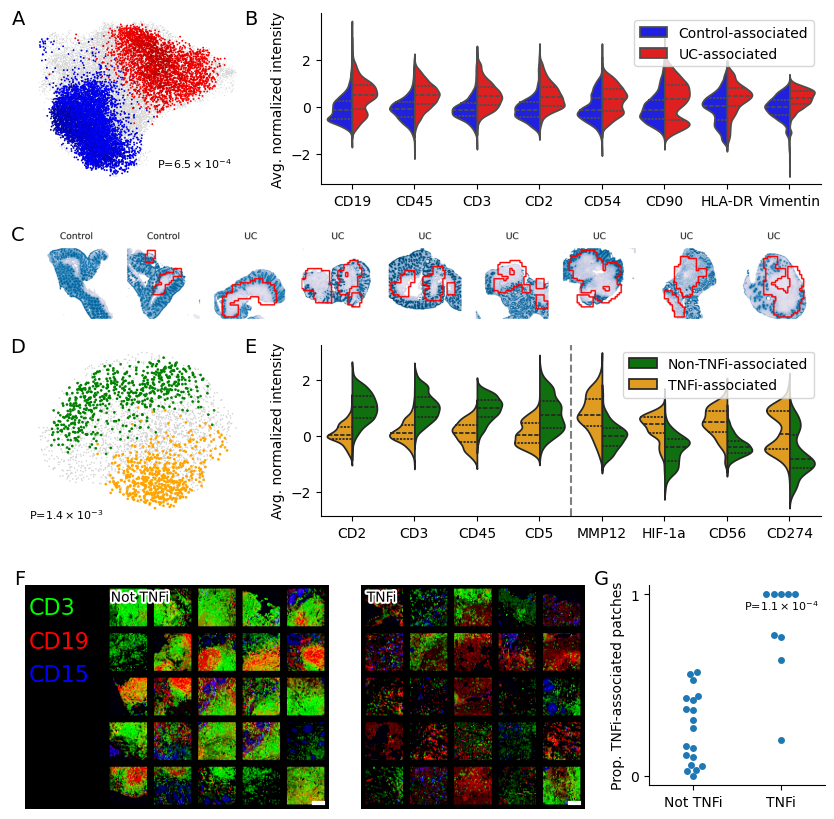

In [617]:
from matplotlib.gridspec import GridSpec

figsize = (8,8); ar = figsize[0]/figsize[1]
insetw = 0.28
fig = plt.figure(figsize=figsize, constrained_layout=True)
width_ratios = np.array([1, 1, 1])
height_ratios = np.array([1, 0.7, 1, 1.5])

gs = GridSpec(4, 3, width_ratios=width_ratios, height_ratios=height_ratios, figure=fig)
umap(fig.add_subplot(gs[0,0]))
markerplot(fig.add_subplot(gs[0,1:]), 8)

sids = ['HC3','HC5','UC24','UC15','UC3','UC4b','UC6','UC2a','UC12']
spatialplot(fig.add_subplot(gs[1,:]), samples_m, sids, 'Cytokeratin', d.obs.ncorr_thresh > 0, ncols=len(sids))
umap_tnf(fig.add_subplot(gs[2,0]))
markerplot_tnf(fig.add_subplot(gs[2,1:]), 4)

lastrow = fig.add_subplot(gs[3,:])
lastrow.axis('off')

mask = d.obs.index.isin(d_tnf.obs[d_tnf.obs.ncorr_thresh < 0].index)
clust_examples(fig.add_axes([0.1,0,insetw,ar*insetw]), mask, tbf_cmap, 'Not TNFi', nx=5, ny=5, scalebar=True, seed=0)
mask = d.obs.index.isin(d_tnf.obs[d_tnf.obs.ncorr_thresh > 0].index)
clust_examples(fig.add_axes([0.42,0,insetw,ar*insetw]), mask, tbf_cmap, 'TNFi', nx=5, ny=5, scalebar=True, seed=0)
cnascore(fig.add_axes([0.78,0.03,1-0.78,ar*insetw-0.03]))
small_color_legend(fig.add_axes([0, 0, 0.1, ar*insetw]), tbf_cmap)

# subpart labels
fig.text(0, 1, 'A', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')
fig.text(0.29, 1, 'B', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')
fig.text(0, 0.73, 'C', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')
fig.text(0, 0.59, 'D', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')
fig.text(0.29, 0.59, 'E', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')
fig.text(0, ar*insetw+0.02, 'F', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')
fig.text(0.73, ar*insetw+0.02, 'G', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')

fig.savefig('../_main/fig.UC.pdf', bbox_inches='tight', dpi=800)
fig.show()

In [424]:
Pdense.numpy_mode()
mask = d_tnf.obs[d_tnf.obs.ncorr_thresh != 0].index.astype(int)[::10]
pixels = Pdense[mask][0].reshape((-1, 10))

data augmentation is off
in numpy mode


In [425]:
import anndata as ad
X = ad.AnnData(X=pixels)
sc.pp.neighbors(X)
sc.tl.umap(X, n_components=3)

In [426]:
np.allclose(pixels[:1600].reshape((40,40,-1)), Pdense[mask][0][0])

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


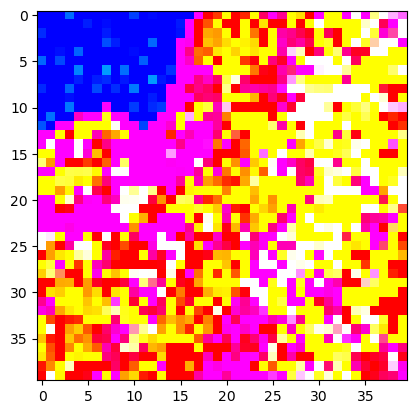

In [427]:
patch = np.zeros((1600,3))
patch[:] = X.obsm['X_umap'][:1600]
patch = patch.reshape((40,40,3))
plt.imshow(patch)
plt.show()

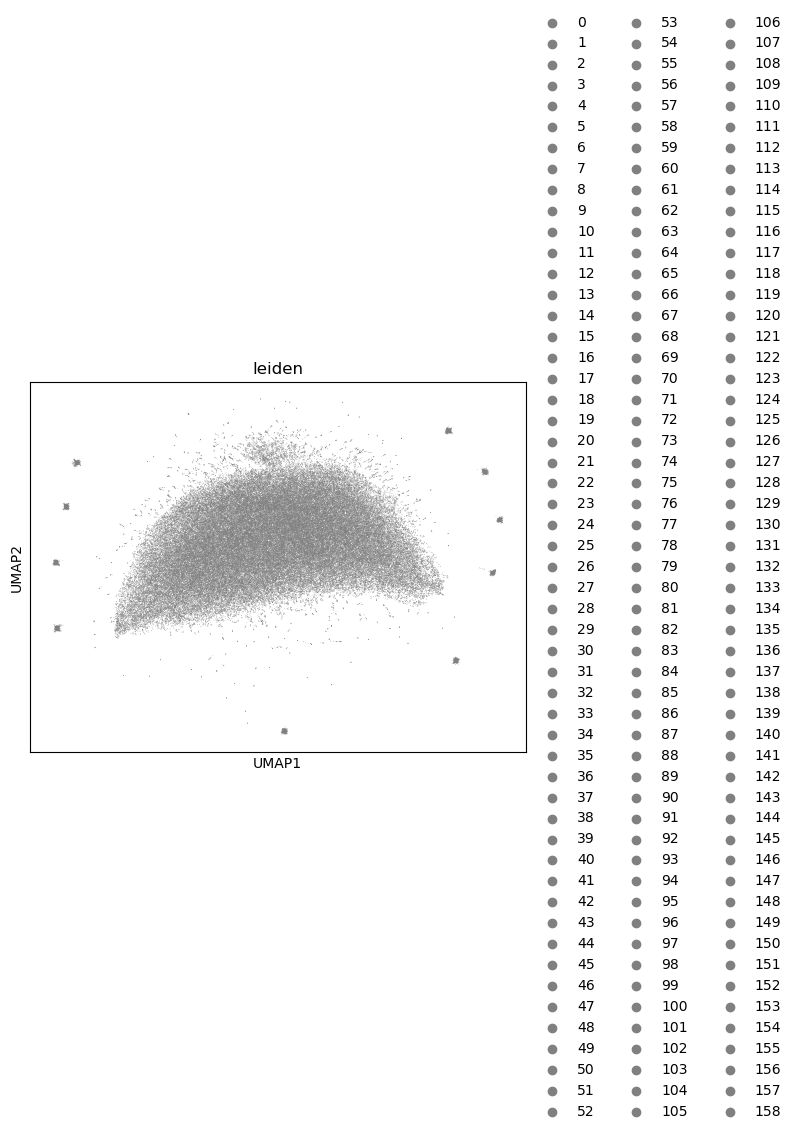

In [396]:
sc.tl.leiden(X, resolution=0.5)
sc.pl.umap(X, color='leiden')

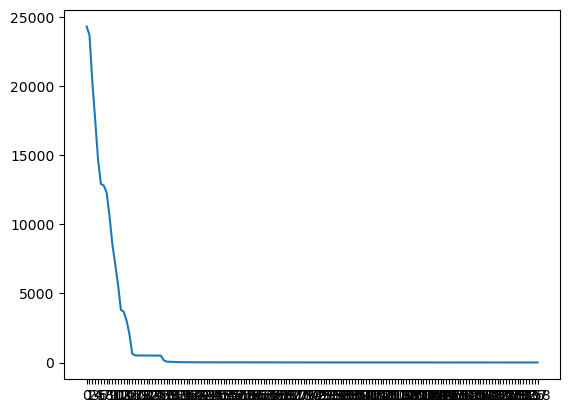

In [397]:
plt.plot(X.obs.leiden.value_counts());